In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X = df.drop(labels=['PROFIT'], axis=1)
Y = df[['PROFIT']]

In [5]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [6]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['STATE']

In [11]:
con

['RND', 'ADMIN', 'MKT']

In [12]:
## Build pipelin for preprocessing
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('OHE',OneHotEncoder(handle_unknown='ignore'))])
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [13]:
X_pre = pre.fit_transform(X)

In [15]:
X_pre[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  0.        ,  0.        ,
         1.        ],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.        ,  0.        ,
         0.        ],
       [ 1.75436374, -0.72825703,  1.62652767,  0.        ,  1.        ,
         0.        ],
       [ 1.55478369, -0.09636463,  1.42221024,  0.        ,  0.        ,
         1.        ],
       [ 1.5049372 , -1.07991935,  1.28152771,  0.        ,  1.        ,
         0.        ]])

In [16]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [18]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


In [24]:
## Train Test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(X_pre,Y,test_size=0.33,random_state=21)

In [25]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
13,0.402078,0.510179,0.343957,1.0,0.0,0.0
28,-0.168793,2.210141,-0.767189,0.0,1.0,0.0
49,-1.622362,-0.157226,-1.369985,1.0,0.0,0.0
40,-0.989577,-0.100900,-0.315786,1.0,0.0,0.0
45,-1.600350,0.101254,-1.727400,0.0,0.0,1.0


In [26]:
xtrain.shape

(33, 6)

In [27]:
xtest.shape

(17, 6)

In [28]:
ytrain.shape

(33, 1)

In [29]:
ytest.shape

(17, 1)

In [30]:
## create a model
from sklearn.tree import DecisionTreeRegressor
dct = DecisionTreeRegressor()
dct.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [31]:
dct.score(xtrain,ytrain)

1.0

In [32]:
dct.score(xtest,ytest)

0.9050552150472376

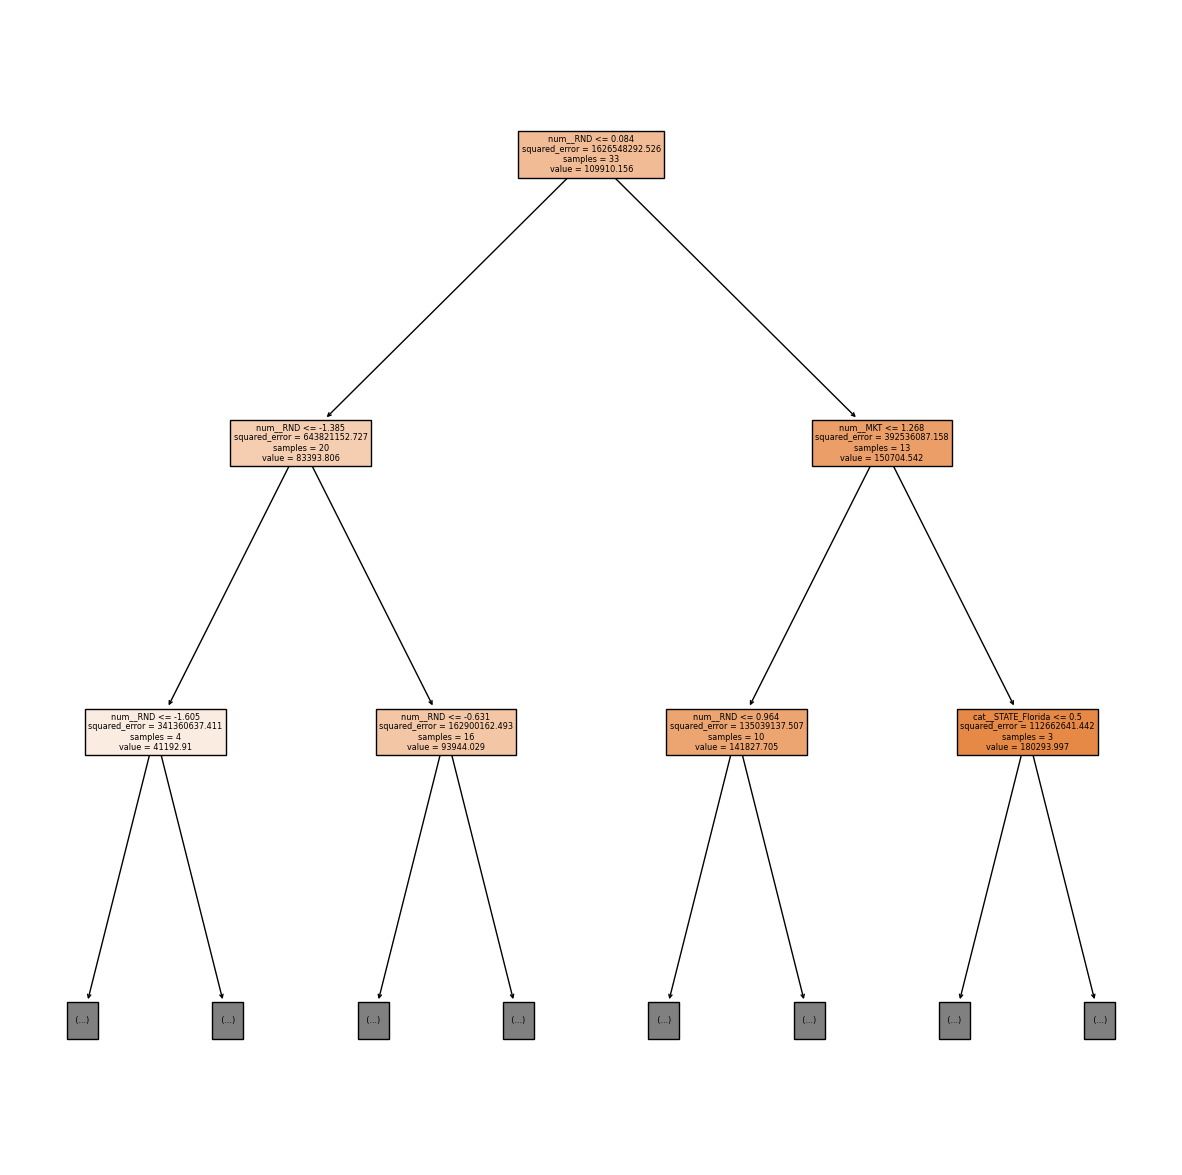

In [33]:
## Plotting base model and decision tree regressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(dct, filled= True, feature_names=list(xtrain.columns),max_depth=2)
plt.show()

In [34]:
## Feature Importances
imp = dct.feature_importances_
imp

array([9.15959904e-01, 9.20380592e-04, 7.65867233e-02, 7.02811327e-06,
       5.56059936e-03, 9.65364448e-04])

In [35]:
imp = pd.Series(imp)
imp.index = xtrain.columns
imp

num__RND                 0.915960
num__ADMIN               0.000920
num__MKT                 0.076587
cat__STATE_California    0.000007
cat__STATE_Florida       0.005561
cat__STATE_New York      0.000965
dtype: float64

In [36]:
imp = imp.sort_values(ascending=False)
imp

num__RND                 0.915960
num__MKT                 0.076587
cat__STATE_Florida       0.005561
cat__STATE_New York      0.000965
num__ADMIN               0.000920
cat__STATE_California    0.000007
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

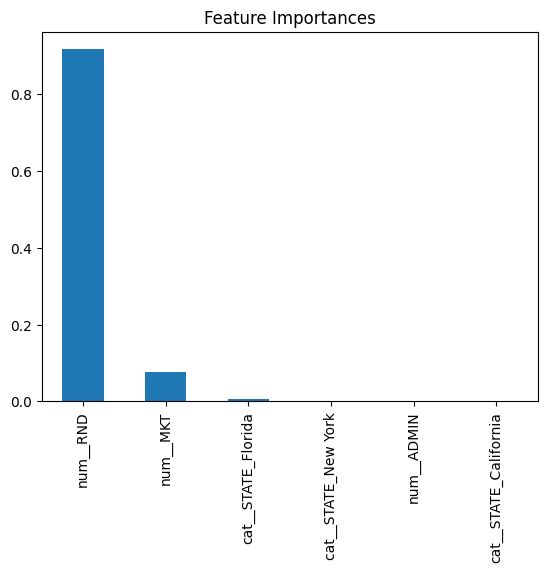

In [37]:
imp.plot(kind='bar',title='Feature Importances')

In [39]:
### MSE, RMSE, MAE
ypred_tr = dct.predict(xtrain)
ypred_ts = dct.predict(xtest)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error = mean_absolute_error(ytest,ypred_ts)
mean_absolute_error

8255.177647058823

In [41]:
mean_squared_error = mean_squared_error(ytest,ypred_ts)
mean_squared_error

142415415.8631765

In [42]:
rmse = mean_squared_error**(1/2)
rmse

11933.793020795043

In [43]:
r2 = r2_score(ytest,ypred_ts)
r2

0.9050552150472376